<a href="https://colab.research.google.com/github/Alina1-10/NM/blob/main/%D0%93%D1%83%D0%B1%D0%BD%D0%B8%D1%86%D1%8C%D0%BA%D0%B0_%D0%90%D0%BB%D1%96%D0%BD%D0%B0_%D0%BF%D1%96%D0%B4%D1%81%D1%83%D0%BC%D0%BA%D0%BE%D0%B2%D0%B5_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Побудувати інтерполяційний багаточлен для всіх вузлів таблиці.

In [ ]:
0.0,0.2,0.5,0.9, 1.3, 1.6
0.000000,0.182322,0.405465,0.641854, 0.832909 ,0.955511

In [1]:
import numpy as np
from math import factorial

# задані точки
x = np.array([0.0,0.2,0.5,0.9, 1.3, 1.6])  # задаємо x генератором списків
y = np.array([0.000000,0.182322,0.405465,0.641854, 0.832909 ,0.955511])

print('x =', x)
print('y =', y)

# Перша інтерполяційна формула Ньютона (інтерполяція вперед)
def newton_forward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]  # Крок між вузлами (він має бути однаковим)

    # Обчислення кінцевих різниць
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n-j):
            delta_y[i, j] = delta_y[i+1, j-1] - delta_y[i, j-1]

    # Обчислення значення q
    q = (x0 - x[0]) / h

    # Використання формули Ньютона для інтерполяції вперед
    ans = delta_y[0, 0]
    q_prod = 1

    for i in range(1, n):
        q_prod *= (q - i + 1)  # Обчислення добутку q*(q-1)*(q-2)*...*(q-i+1)
        ans += (q_prod * delta_y[0, i]) / factorial(i)

    return ans

# Обчислюємо значення функції в точці x = 0.1
x1 = 0 #Замінити точку вашого варіанту (точка на початку відрізку)
y1 = newton_forward_interpolation(x, y, x1)

print(f"f({x1}) = {y1}")

x = [0.  0.2 0.5 0.9 1.3 1.6]
y = [0.       0.182322 0.405465 0.641854 0.832909 0.955511]
f(0) = 0.0


In [2]:
def newton_backward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]  # Крок між вузлами (він має бути однаковим)

    # Обчислення кінцевих різниць
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n-j):
            delta_y[i, j] = delta_y[i+1, j-1] - delta_y[i, j-1]

    # Обчислення значення q
    q = (x0 - x[-1]) / h

    # Використання формули Ньютона для інтерполяції назад
    ans = delta_y[-1, 0]  # Починаємо з y_n
    q_prod = 1

    for i in range(1, n):
        q_prod *= (q + i - 1)  # Обчислення добутку q*(q+1)*(q+2)*...*(q+i-1)
        ans += (q_prod * delta_y[n-i-1, i]) / factorial(i)

    return ans

# Обчислюємо значення функції в точці x = 0.9
x2 = 1.6 #точка в кінці відрізка
y2 = newton_backward_interpolation(x, y, x2)

print(f"f({x2}) = {y2}")


f(1.6) = 0.955511


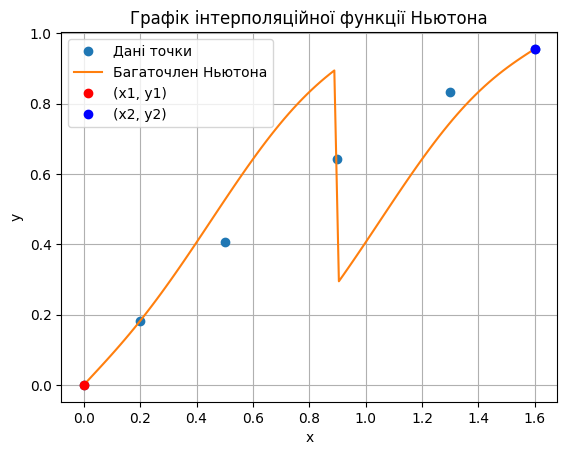

In [3]:
import matplotlib.pyplot as plt

# будуємо графік інтерполяційної функції
xx = np.linspace(np.min(x), np.max(x), 100)
yy = np.zeros_like(xx)
for i in range(len(xx)):
    # Використовуйте відповідну функцію інтерполяції
    if xx[i] <= x[len(x) // 2]:  # Використовуємо інтерполяцію вперед для першої половини
        yy[i] = newton_forward_interpolation(x, y, xx[i])
    else:  # Використовуємо інтерполяцію назад для другої половини
        yy[i] = newton_backward_interpolation(x, y, xx[i])

plt.plot(x, y, 'o', label='Дані точки')
plt.plot(xx, yy, label="Багаточлен Ньютона")
plt.plot(x1, y1, 'ro', label='(x1, y1)')
plt.plot(x2, y2, 'bo', label='(x2, y2)')
plt.title("Графік інтерполяційної функції Ньютона")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

2.Побудувати інтерполяційний багаточлен Ньютона з використанням таблиці кінцевих функцій.

In [4]:
import numpy as np

# Таблиця значень функції
x_values = np.array([0.0,0.2,0.5,0.9, 1.3, 1.6])
y_values = np.array([0.000000,0.182322,0.405465,0.641854, 0.832909 ,0.955511])

# Крок таблиці
h = x_values[1] - x_values[0]

# Обчислення кінцевих різниць
def finite_differences(y):
    n = len(y)
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            delta_y[i, j] = delta_y[i + 1, j - 1] - delta_y[i, j - 1]

    return delta_y

# Отримуємо таблицю кінцевих різниць
delta_table = finite_differences(y_values)

# Виводимо таблицю кінцевих різниць для наочності
print("Таблиця кінцевих різниць:")
np.set_printoptions(precision=4, suppress=True)
print(delta_table)

# Значення кінцевих різниць для першої та другої похідних
#Змінити індекс відповідно рядка, який використовуєте (нумерація починається з нуля)
delta_y1 = delta_table[1, 1]  # Δy1
delta2_y1 = delta_table[1, 2]  # Δ²y1
delta3_y1 = delta_table[1, 3]  # Δ³y1
delta4_y1 = delta_table[1, 4]  # Δ⁴y1

# Функція для обчислення першої похідної за формулою Ньютона
def first_derivative(delta_y1, delta2_y1, delta3_y1, delta4_y1, h):
    return (delta_y1 - delta2_y1 / 2 + delta3_y1 / 3 - delta4_y1 / 4) / h

# Функція для обчислення другої похідної за формулою Ньютона
def second_derivative(delta2_y1, delta3_y1, delta4_y1, h):
    return (delta2_y1 - delta3_y1  + 11*delta4_y1 / 12) / h**2

# Обчислюємо першу та другу похідні в точці x = 0.1
y1_prime = first_derivative(delta_y1, delta2_y1, delta3_y1, delta4_y1, h)
y1_double_prime = second_derivative(delta2_y1, delta3_y1, delta4_y1, h)

# Округляємо до точності 0.001
y1_prime = round(y1_prime, 3)
y1_double_prime = round(y1_double_prime, 3)

# Виводимо результати
print(f"\nПерша похідна y'(0.1) ≈ {y1_prime}")
print(f"Друга похідна y''(0.1) ≈ {y1_double_prime}")


Таблиця кінцевих різниць:
[[ 0.      0.1823  0.0408 -0.0276 -0.031   0.0665]
 [ 0.1823  0.2231  0.0132 -0.0586  0.0355  0.    ]
 [ 0.4055  0.2364 -0.0453 -0.0231  0.      0.    ]
 [ 0.6419  0.1911 -0.0685  0.      0.      0.    ]
 [ 0.8329  0.1226  0.      0.      0.      0.    ]
 [ 0.9555  0.      0.      0.      0.      0.    ]]

Перша похідна y'(0.1) ≈ 0.941
Друга похідна y''(0.1) ≈ 2.608


In [5]:
import numpy as np

# Таблиця значень функції
#x_values = np.array([2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6])
#y_values = np.array([3.526, 3.782, 3.945, 4.043, 4.104, 4.155, 4.222, 4.331, 4.507, 4.775, 5.159, 5.683])

# Крок таблиці
h = x_values[1] - x_values[0]

# Обчислення кінцевих різниць
# Перша похідна
first_derivative = (y_values[1:] - y_values[:-1]) / h

# Друга похідна
second_derivative = (first_derivative[1:] - first_derivative[:-1]) / h

# Виведення результатів
print("Перша похідна:")
print("x = 0.1:", round(first_derivative[0],3))  # Перший елемент, який відповідає x = 0.1

print("Друга похідна:")
print("x = 0.1:", round(second_derivative[0], 3))  # Перший елемент, який відповідає x = 0.1

Перша похідна:
x = 0.1: 0.912
Друга похідна:
x = 0.1: 1.021


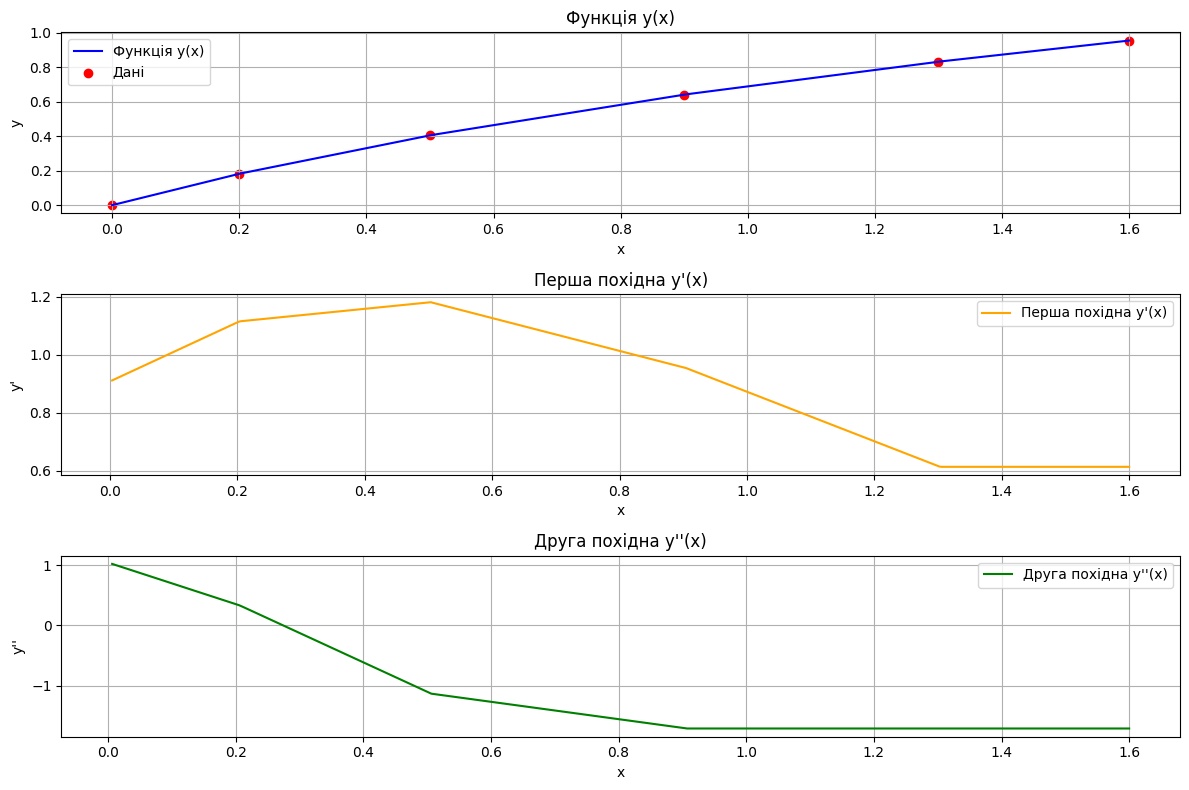

In [6]:
import matplotlib.pyplot as plt

# Інтерполяція значень для побудови графіків
x_fine = np.linspace(x_values[0], x_values[-1], 500)
y_fine = np.interp(x_fine, x_values, y_values)

# Обчислення першої та другої похідної для нових точок
first_deriv_fine = np.interp(x_fine[:-1], x_values[:-1], first_derivative)
second_deriv_fine = np.interp(x_fine[:-2], x_values[:-2], second_derivative)

# Створюємо графіки
plt.figure(figsize=(12, 8))

# Графік функції
plt.subplot(3, 1, 1)
plt.plot(x_fine, y_fine, label='Функція y(x)', color='blue')
plt.scatter(x_values, y_values, color='red', label='Дані')
plt.title('Функція y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Графік першої похідної
plt.subplot(3, 1, 2)
plt.plot(x_fine[1:], first_deriv_fine, label="Перша похідна y'(x)", color='orange')
plt.title("Перша похідна y'(x)")
plt.xlabel('x')
plt.ylabel("y'")
plt.legend()
plt.grid(True)

# Графік другої похідної
plt.subplot(3, 1, 3)
plt.plot(x_fine[2:], second_deriv_fine, label="Друга похідна y''(x)", color='green')
plt.title("Друга похідна y''(x)")
plt.xlabel('x')
plt.ylabel("y''")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

3. Побудувати ряд Тейлора 3-го порядку  для аналітичної функції.

f'(x) = 4*cos(4*x)
f''(x) = -16*sin(4*x)
f'''(x) = -64*cos(4*x)
f''''(x) = 256*sin(4*x)
f(0) = 0
T(x) = -10.6666666666667*x**3 + 4.0*x


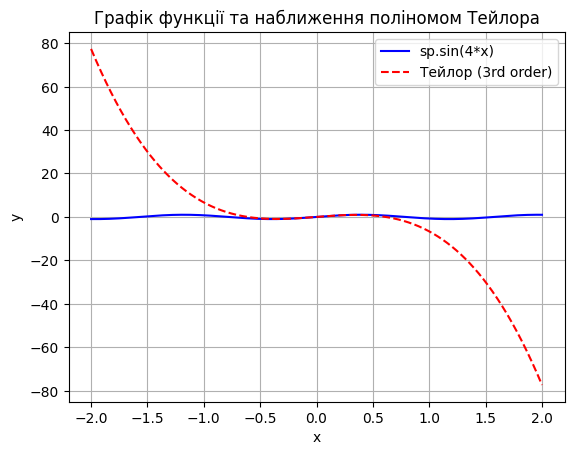

In [8]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Задаємо символьну змінну x та функцію f(x)
x = sp.symbols('x')

f = sp.sin(4*x)

# Знаходимо перші три похідні
f1 = sp.diff(f, x)
f2 = sp.diff(f1, x)
f3 = sp.diff(f2, x)
f4 = sp.diff(f3, x)

# Виводимо похідні
print("f'(x) =", f1)
print("f''(x) =", f2)
print("f'''(x) =", f3)
print("f''''(x) =", f4)

# Знаходимо значення функції та її похідних в точці x=0
x0 = 0
f_x0 = f.subs(x, x0).evalf()
f1_x0 = f1.subs(x, x0).evalf()
f2_x0 = f2.subs(x, x0).evalf()
f3_x0 = f3.subs(x, x0).evalf()

# Обчислюємо значення полінома Тейлора в точці x=0
T = f_x0 + f1_x0*(x-x0) + (f2_x0/2)*(x-x0)**2 + (f3_x0/6)*(x-x0)**3

# Виводимо значення функції та її наближення за поліномом Тейлора в точці x=0
print("f(0) =", f_x0.round(3))
print("T(x) =",T.evalf())

# Будуємо графіки
x_vals = np.linspace(-2, 2, 1000)
f_vals = np.array([f.subs(x, xi).evalf() for xi in x_vals])
T_vals = np.array([T.subs(x, xi).evalf() for xi in x_vals])

fig, ax = plt.subplots()
ax.plot(x_vals, f_vals, label='sp.sin(4*x)', color='blue')
ax.plot(x_vals, T_vals, label='Тейлор (3rd order)', color='red', linestyle='--')
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Графік функції та наближення поліномом Тейлора")
plt.grid(True)
plt.show()


Перша похідна f'(x): 4*cos(4*x)
Друга похідна f''(x): -16*sin(4*x)
Третя похідна f'''(x): -64*cos(4*x)
Значення функції в точці x0=0: 0.0


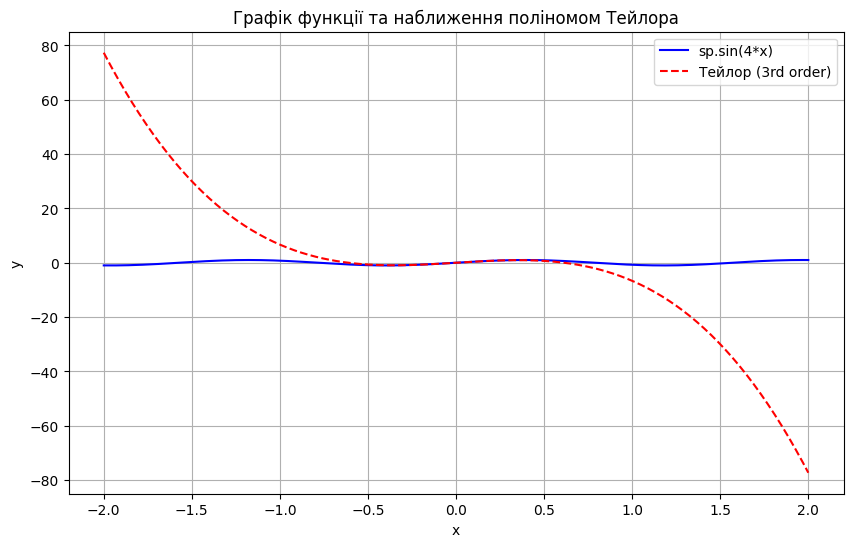

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Задаємо символьну змінну x
x_sym = sp.symbols('x')
# Задана функція
f = sp.sin(4*x)
# Обчислюємо перші три похідні
f_1 = sp.diff(f, x_sym)
f_2 = sp.diff(f_1, x_sym)
f_3 = sp.diff(f_2, x_sym)
# Виводимо похідні
print("Перша похідна f'(x):", f_1)
print("Друга похідна f''(x):", f_2)
print("Третя похідна f'''(x):", f_3)
# Компілюємо функції з SymPy в функції Python
f_func = sp.lambdify(x_sym, f, 'numpy')
f_1_func = sp.lambdify(x_sym, f_1, 'numpy')
f_2_func = sp.lambdify(x_sym, f_2, 'numpy')
f_3_func = sp.lambdify(x_sym, f_3, 'numpy')
# Точка x0
x0 = 0
# Значення функції та многочлена Тейлора в точці x0
f_x0 = f_func(x0)
# Виведення значень
print(f"Значення функції в точці x0={x0}: {f_x0}")
# Діапазон значень x
x = np.linspace(-2, 2, 400)
# Значення функції та поліном Тейлора
f_x = f_func(x)
taylor_x = f_func(0) + f_1_func(0) * x + (f_2_func(0) * x**2) / 2 + (f_3_func(0) * x**3) / 6
# Побудова графіків
plt.figure(figsize=(10, 6))
plt.plot(x, f_x, label='sp.sin(4*x)', color='blue')
plt.plot(x, taylor_x, label='Тейлор (3rd order)', color='red', linestyle='--')
plt.legend()
plt.title('Графік функції та наближення поліномом Тейлора')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


taylor=         3             2
-2.385 x - 8.882e-16 x + 1.628 x - 3.408e-16


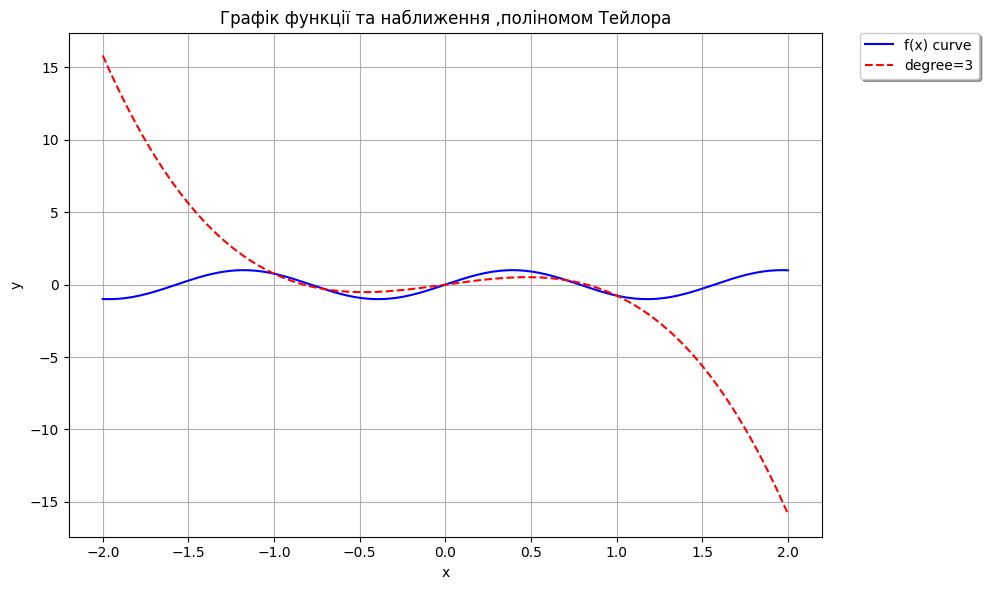

In [10]:
#Побудова полімонома Тейлора за допомогою approximate_taylor_polynomial
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial

# Задана функція
def f(x):
    return np.sin(4*x)
x = np.linspace(-2.0, 2.0, num=400)
plt.figure(figsize=(10, 6))
plt.plot(x, f(x), label="f(x) curve", color='blue')
degree = 3
taylor = approximate_taylor_polynomial(f, 0, degree, 1)
print('taylor=', taylor)
plt.plot(x, taylor(x), label=f"degree={degree}", color='red', linestyle='--' )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',borderaxespad=0.0, shadow=True)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Графік функції та наближення ,поліномом Тейлора")
plt.tight_layout()
plt.grid()
plt.show()

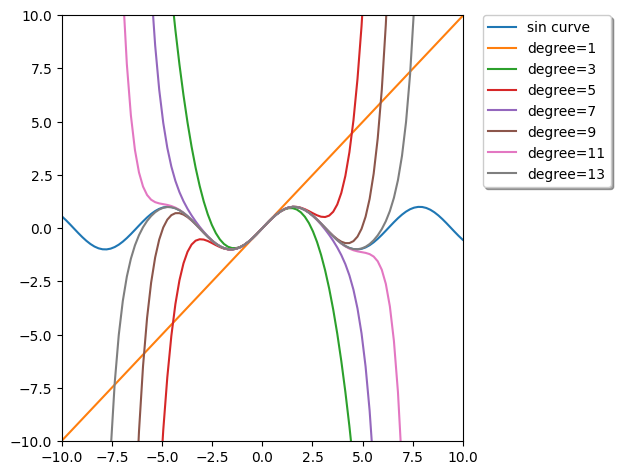

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial
x = np.linspace(-10.0, 10.0, num=100)
plt.plot(x, np.sin(x), label="sin curve")
for degree in np.arange(1, 15, step=2):
    sin_taylor = approximate_taylor_polynomial(np.sin, 0, degree, 1,
                                               order=degree + 2)
    plt.plot(x, sin_taylor(x), label=f"degree={degree}")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0.0, shadow=True)
plt.tight_layout()
plt.axis([-10, 10, -10, 10])
plt.show()

4. Побудувати кубічний сплайн.


In [12]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

In [13]:
x = np.array([0.0,0.2,0.5,0.9, 1.3, 1.6])
y = np.array([0.000000,0.182322,0.405465,0.641854, 0.832909 ,0.955511])

n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n + 1)  # Розширюємо на один елемент для останнього індексу c[n]

alpha = np.zeros(n)
for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])

l = np.ones(n + 1)  # Розширюємо l на один елемент
mu = np.zeros(n)
z = np.zeros(n + 1)  # Розширюємо на один елемент

# Пряма хода для знаходження l, mu, z
for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

# Крайова умова: c[n] = 0
l[n] = 1
z[n] = 0
c[n] = 0

# Зворотний хід для знаходження c, b, d
for j in range(n-1, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

# Виведення аналітичного вигляду кубічного сплайну для кожного відрізка
for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

Відрізок 1:
S_0(x) = 0.0 + 0.9413(x - 0.0) + 0.0(x - 0.0)^2 + -0.7426(x - 0.0)^3, x належить [0.0, 0.2]
Відрізок 2:
S_1(x) = 0.182322 + 0.8522(x - 0.2) + -0.4455(x - 0.2)^2 + 0.2808(x - 0.2)^3, x належить [0.2, 0.5]
Відрізок 3:
S_2(x) = 0.405465 + 0.6607(x - 0.5) + -0.1929(x - 0.5)^2 + 0.0464(x - 0.5)^3, x належить [0.5, 0.9]
Відрізок 4:
S_3(x) = 0.641854 + 0.5287(x - 0.9) + -0.1371(x - 0.9)^2 + 0.0238(x - 0.9)^3, x належить [0.9, 1.3]
Відрізок 5:
S_4(x) = 0.832909 + 0.4304(x - 1.3) + -0.1086(x - 1.3)^2 + 0.1207(x - 1.3)^3, x належить [1.3, 1.6]


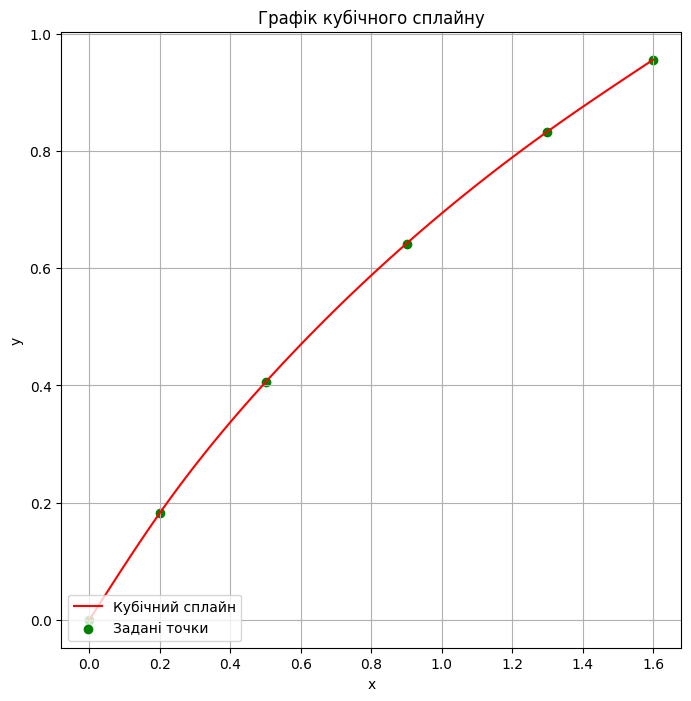

In [14]:
x_values = np.linspace(np.min(x), np.max(x), 100)  # Діапазон для побудови графіка
y_values = [ ]# Значення сплайна

# Обчислення значень сплайна для кожного відрізка
for i in range(n):
    mask = (x_values >= x[i]) & (x_values <= x[i + 1])
    x_interval = x_values[mask]
    y_interval = a[i] + b[i] * (x_interval - x[i]) + c[i] * (x_interval - x[i]) ** 2 + d[i] * (x_interval - x[i]) ** 3
    y_values.extend(y_interval)

# Побудова графіка
plt.figure(figsize=(8, 8))
plt.plot(x_values, y_values, label="Кубічний сплайн", color='r')
plt.scatter(x, y, label="Задані точки", color='g')
plt.xlabel("x")
plt.ylabel("y")
plt.title('Графік кубічного сплайну')
plt.legend(loc= "lower left")
plt.grid()
plt.show()

In [15]:
from scipy.interpolate import CubicSpline

# Вхідні дані
x = np.array([0.0,0.2,0.5,0.9, 1.3, 1.6])
y = np.array([0.000000,0.182322,0.405465,0.641854, 0.832909 ,0.955511])

# Побудова кубічного сплайну
cs = CubicSpline(x, y)

# Виведення коефіцієнтів сплайну для кожного відрізка
for i in range(len(x)-1):
    coeffs = cs.c[:, i]  # Коефіцієнти для i-го інтервалу
    spline = f'S_{i+1}(x) = {coeffs[0]:.4f}*(x - {x[i]})^3 + {coeffs[1]:.4f}*(x - {x[i]})^2 + {coeffs[2]:.4f}*(x - {x[i]}) + {coeffs[3]:.4f}'
    print(spline)

S_1(x) = 0.1524*(x - 0.0)^3 + -0.4423*(x - 0.0)^2 + 0.9940*(x - 0.0) + 0.0000
S_2(x) = 0.1524*(x - 0.2)^3 + -0.3508*(x - 0.2)^2 + 0.8353*(x - 0.2) + 0.1823
S_3(x) = 0.0653*(x - 0.5)^3 + -0.2137*(x - 0.5)^2 + 0.6660*(x - 0.5) + 0.4055
S_4(x) = 0.0334*(x - 0.9)^3 + -0.1353*(x - 0.9)^2 + 0.5264*(x - 0.9) + 0.6419
S_5(x) = 0.0334*(x - 1.3)^3 + -0.0952*(x - 1.3)^2 + 0.4342*(x - 1.3) + 0.8329


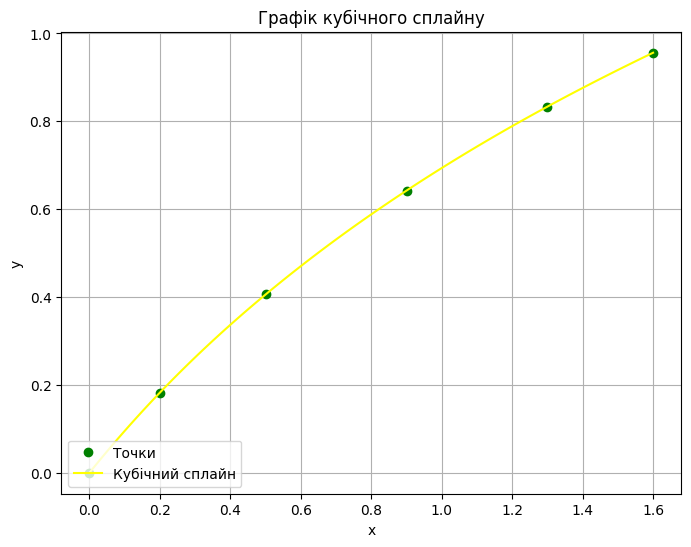

In [16]:
cs = CubicSpline(x, y)

# Генерація нових точок для гладкого графіку сплайна
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

# Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки', color='g')
plt.plot(x_new, y_new, color="yellow", label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графік кубічного сплайну')
plt.legend(loc= "lower left")
plt.grid(True)
plt.show()

In [17]:
def gauss(A, b):
    n = len(b)
    for i in range(n):
        # Pivoting
        max_row = max(range(i, n), key=lambda r: abs(A[r][i]))
        A[i], A[max_row] = A[max_row], A[i]
        b[i], b[max_row] = b[max_row], b[i]

        # Elimination
        for j in range(i+1, n):
            factor = A[j][i] / A[i][i]
            b[j] -= factor * b[i]
            for k in range(i, n):
                A[j][k] -= factor * A[i][k]

    # Back substitution
    x = [0 for _ in range(n)]
    for i in range(n-1, -1, -1):
        sum_ax = sum(A[i][j] * x[j] for j in range(i+1, n))
        x[i] = (b[i] - sum_ax) / A[i][i]
    return x

# Таблиця значень функції
x = [0.0,0.2,0.5,0.9, 1.3, 1.6]
f = [0.000000,0.182322,0.405465,0.641854, 0.832909 ,0.955511]

d = len(x)

# Створюємо нульову матрицю А та нульовий вектор b
s = [0]*4*(d-1)
A = []
for i in range(4*(d-1)):
    A.append(s[:])
b = s[:]

# Відповідність сплайнів табличним значенням функції на лівих кінцях відрізків
for j in range(d-1):
    for i in range(4):
        A[j][i+4*j] = (x[j]-x[j+1])**i
    b[j] = f[j]

# Відповідність сплайнів табличним значенням функції на правих кінцях відрізків
for j in range(d-1, 2*(d-1)):
    A[j][4*(j-(d-1))] = 1
    b[j] = f[j-(d-1)+1]

# Відповідність значень перших похідних сусідніх сплайнів
for j in range(2*(d-1), 3*d-4):
    for i in range(4):
        if i == 0:
            A[j][1+4*(j-2*(d-1))] = -1
        else:
            A[j][i+4+4*(j-2*(d-1))] = i*(x[1+(j-2*(d-1))]-x[2+(j-2*(d-1))])**(i-1)

# Відповідність значень других похідних сусідніх сплайнів
for j in range(3*d-4, 4*d-6):
    A[j][2+4*(j-(3*d-4))] = -2
    A[j][6+4*(j-(3*d-4))] = 2
    A[j][7+4*(j-(3*d-4))] = 6*(x[1+j-(3*d-4)]-x[2+j-(3*d-4)])

# Крайові умови. Визначення нульових значень других похідних на кінцях відрізка
A[4*d-6][2] = 2
A[4*d-6][3] = 6*(x[0]-x[1])
A[4*d-5][-2] = 2

# Обчислення коефіцієнтів сплайнів
c = gauss(A, b)

# Відображаємо сплайни
print('Сплайни')
for j in range(d-1):
    spline = 'S_' + str(j+1) + '(x) = ' + str(c[0+4*j]) + '+'
    for i in range(1, 4):
        spline += str(c[i+4*j]) + '*(x-' + str(x[j+1]) + ')^' + str(i) + '+'
    spline = spline[:-1].replace('+-', '-').replace('^1', '')
    spline += ', на [' + str(x[j]) + ';' + str(x[j+1]) + ']'
    print(spline)

Сплайни
S_1(x) = 0.182322+0.852204081893794*(x-0.2)-0.4455443857965446*(x-0.2)^2-0.7425739763275743*(x-0.2)^3, на [0.0;0.2]
S_2(x) = 0.405465+0.6606851519513756*(x-0.5)-0.19285204734485023*(x-0.5)^2+0.2807692649463271*(x-0.5)^3, на [0.2;0.5]
S_3(x) = 0.641854+0.5286880150351886*(x-0.9)-0.13714079494561726*(x-0.9)^2+0.046426043666027456*(x-0.9)^3, на [0.5;0.9]
S_4(x) = 0.832909+0.4303927879078694*(x-1.3)-0.10859727287268074*(x-1.3)^2+0.02378626839411377*(x-1.3)^3, на [0.9;1.3]
S_5(x) = 0.955511+0.3978136060460652*(x-1.6)+0.0*(x-1.6)^2+0.1206636365252008*(x-1.6)^3, на [1.3;1.6]


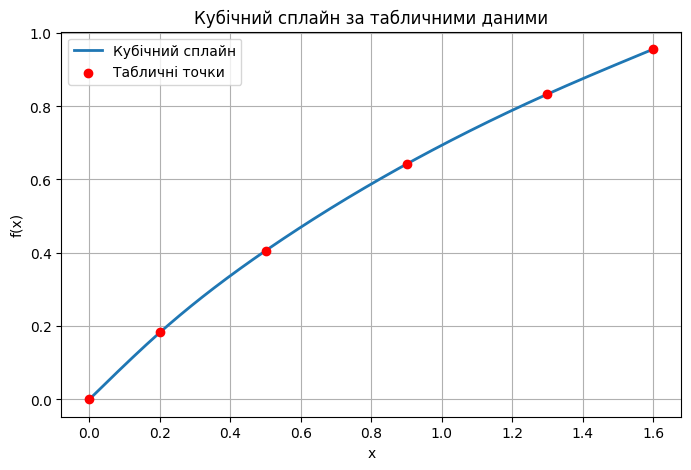

In [18]:
x_values = np.linspace(min(x), max(x), 300)
y_values = []

for xv in x_values:
    for j in range(d - 1):
        if x[j] <= xv <= x[j + 1]:
            dx = xv - x[j + 1]
            y = c[0 + 4 * j] + c[1 + 4 * j] * dx + c[2 + 4 * j] * dx**2 + c[3 + 4 * j] * dx**3
            y_values.append(y)
            break

plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, label='Кубічний сплайн', linewidth=2)
plt.scatter(x, f, color='red', label='Табличні точки', zorder=5)
plt.title('Кубічний сплайн за табличними даними')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
